In [60]:
import pickle
import matrix
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
def transform(_matrix_documents, model_file_name):    
    with open(model_file_name, 'rb') as fd:
        model = pickle.load(fd)
        topics = model.transform(_matrix_documents)
    return topics, model.components_

def embedding_data(topics):
    return TSNE(n_components=2,random_state=5).fit_transform(topics) 

In [5]:
#применяем модель hh к данным hh
matrix_documents, terms_hh = matrix.read_matrix('./matrix')
original_matrix = matrix_documents.toarray()
topics_hh, components_hh = transform(original_matrix, './models/hh_model')
embedding_hh = embedding_data(topics_hh)

In [49]:
#применяем модель обр-программ по модулям к данных обр-программ по модулю
matrix_documents_ed, terms_ed = matrix.read_matrix('./ed_matrix')
original_matrix =matrix_documents_ed.toarray()
topics_ed, components_ed = transform(original_matrix, './models/ed_model')
embedding_ed = embedding_data(topics_ed)

In [51]:
matrix_documents_ed_dist, terms_ed_dist = matrix.read_matrix('./ed_matrix_dist')
original_matrix =matrix_documents_ed_dist.toarray()
topics_ed_dist, components_ed_dist = transform(original_matrix, './models/ed_dist_model')
embedding_ed_dist = embedding_data(topics_ed_dist)

In [52]:
matrix_documents_com_ed, terms_com_ed = matrix.read_matrix('./com_ed')
original_matrix = matrix_documents_com_ed.toarray()
topics_com_ed, components_com_ed = transform(original_matrix, './models/com_hh_model')
embedding_com_ed = embedding_data(topics_com_ed)

In [4]:
matrix_documents_hh_com, terms_hh_com = matrix.read_matrix('./com_matrix')
original_matrix = matrix_documents_hh_com.toarray()
topics_hh_com, components_hh_com = transform(original_matrix, './models/com_ed_model')
embedding_hh_com = embedding_data(topics_hh_com)

In [62]:
matrix_documents_com_dist_ed, terms_com_dist_ed = matrix.read_matrix('./com_ed_dist')
original_matrix = matrix_documents_com_dist_ed.toarray()
topics_com_dist_ed, components_com_dist_ed = transform(original_matrix, './models/com_hh_dist_model')
embedding_com_dist_ed = embedding_data(topics_com_dist_ed)

In [10]:
matrix_documents_hh_com_matrix_dist, terms_hh_com_matrix_dist = matrix.read_matrix('./com_matrix_dist')
original_matrix = matrix_documents_hh_com_matrix_dist.toarray()
topics_hh_com_matrix_dist, components_hh_com_matrix_dist = transform(original_matrix, './models/com_ed_dist_model')
embedding_hh_com_matrix_dist = embedding_data(topics_hh_com_matrix_dist)

In [54]:
def print_topics(count_related_words, components, terms):
    terms = []
    with open('./matrix_terms', encoding='utf-8') as fd:
        data = fd.readlines()
        for i in data:
            terms.append(i.strip())
    for i, comp in enumerate(components):
        terms_comp = zip(terms, comp)
        sorted_terms =  sorted(terms_comp, key=lambda x: x[1], reverse=True)[:count_related_words]
        topic = "Topic " + str(i) + ": "
        for sorted_term in sorted_terms:
            if sorted_term[0] in terms:
                topic = topic + sorted_term[0] + ' '
        print()
        print(topic)
        
def print_topics_ed(count_related_words, components, terms, voc_name):
    res = []
    with open(voc_name, 'r', encoding='utf-8') as fd:
        data = fd.readlines()
        for i in data:
            res.append(i.strip())
    for i, comp in enumerate(components):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:count_related_words]
        topic = "Topic " + str(i) + ": "
        for sorted_term in sorted_terms:
            if sorted_term[0] in res:
                topic = topic + sorted_term[0] + ' '
        print()
        print(topic)

def visualize_topic(embedding, topics):
    clusters_by_topics = np.argmax(topics, axis=1).reshape((topics.shape[0], 1))
    df = pd.DataFrame(clusters_by_topics, columns=['cluster_n'])
    df['Id'] = np.arange(len(df))
    df['x'] = embedding[:, 0]
    df['y'] = embedding[:, 1]

    plt.figure(figsize=(20, 15))
    group_by_cluster = df.groupby('cluster_n')
    print(len(group_by_cluster))
    for name, group in group_by_cluster:
        print('{} - {}'.format(name, len(group)))
        c = np.array([np.random.rand(3,)]* len(group['Id']))
        plt.scatter(group['x'], group['y'],
                s=20,
                c=c,
                edgecolor='none',
               label=name)
    
        plt.legend(fontsize=12)
        
def print_education_program_name_by_topic(topics, name):
    clusters_by_topics = np.argmax(topics, axis=1).reshape((topics.shape[0], 1))
    df = pd.DataFrame(clusters_by_topics, columns=['cluster_n'])
    df['name'] = name
    group_by_cluster = df.groupby('cluster_n')
    for name, group in group_by_cluster:
        name_by_group = []
        for program_name in group['name']:
            name_by_group.append(str(program_name))
        print('Topic {}: {}'.format(name,';'.join(name_by_group)))

25
0 - 1305
1 - 315
2 - 1474
3 - 6521
4 - 387
5 - 335
6 - 5601
7 - 123
8 - 312
9 - 2135
10 - 2463
11 - 603
12 - 684
13 - 4090
14 - 5762
15 - 2964
16 - 2063
17 - 3188
18 - 4165
19 - 572
20 - 303
21 - 327
22 - 1308
23 - 906
24 - 187

Topic 0: ремонт оборудование техника настройка обслуживание установка оргтехника компьютерный пк работа компьютер пользователь принтер сеть диагностика рабочий обеспечение windows офисный поддержка ти технический неисправность знание программный торговый кассовый локальный удалённый опыт требование место сетевой замена сервисный автор устройство устранение образование периферийный терминал мелкий ноутбук подключение ос ответственный проблема аппаратный лвс администрирование расходный администратор мфу интернет высокий сканер сотрудник доступ видеонаблюдение картридж станция железо умение операционный клиент монтаж системный навык офис компания 

Topic 1: предлагать заработный дмс офис льготный возможность тк белый компенсация плат официальный бонус отпуск ко


Topic 14: продажа клиент работа компания услуга переговоры опыт ведение менеджер договор активный звонок проведение требование высокий речь партнёр развитие коммерческий рынок умение навык поиск грамотный контроль база обязанность сфера новый презентация желание заказ предложение выполнение результат клиентский интернет связь план заключение ти продукт товар отдел подготовка встреча пк лицо отчётность организация сделка образование привлечение отношение коммуникабельность корпоративный знание потенциальный ответственность входящая деловой b2b магазин crm сотрудник решение личный телефон проект бизнес 

Topic 15: 1с конфигурация предприятие типовой учёт платформа доработка знание разработка опыт работа зуп erp пользователь бухгалтерия программирование программист бухгалтерский система база форма ут обмен упп требование внедрение отчёт сертификат механизм управляемый поддержка функционал сопровождение ти программный бп технический обновление автоматизация скд компания наличие задание за

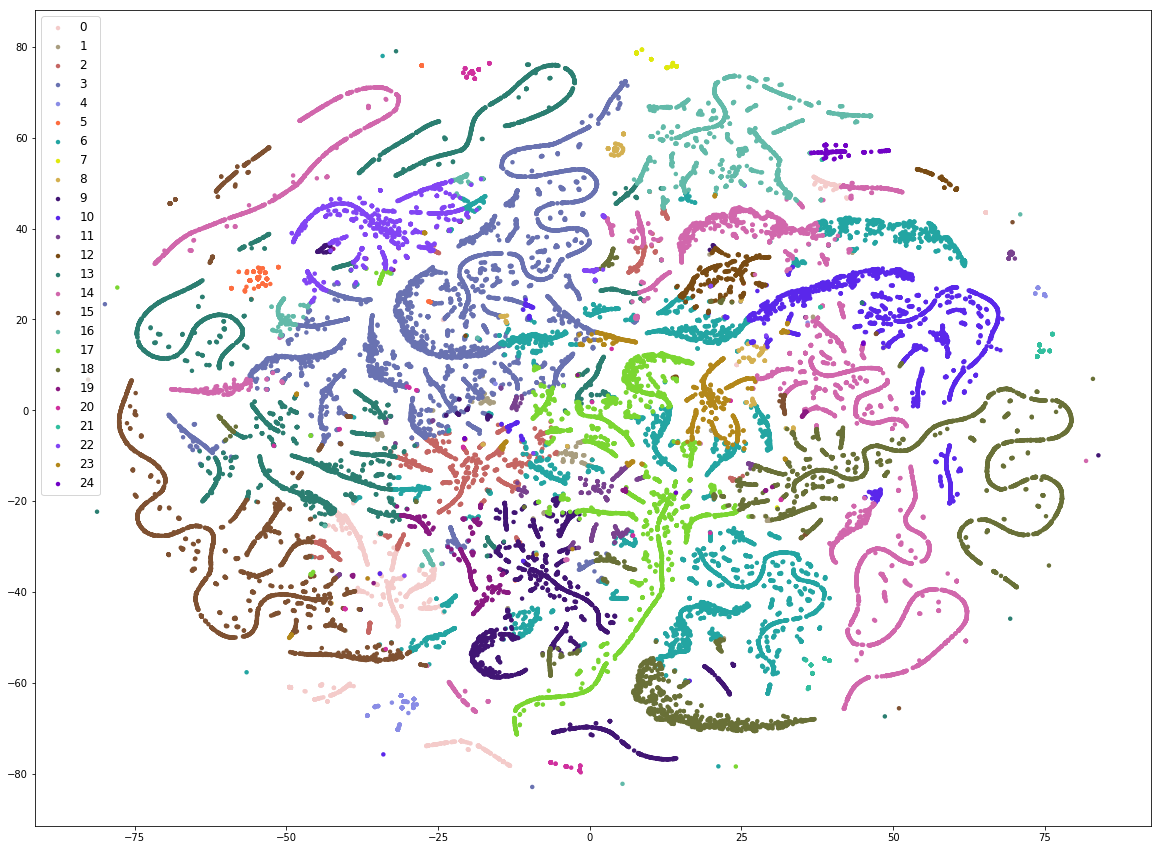

In [68]:
# топики по hh
visualize_topic(embedding_hh, topics_hh)
print_topics(70,components_hh, terms_hh)

Topic 4: Безопасность сетевых технологий;Безопасные автоматизированные системы;Информационное кодирование;Информационные технологии;Программно-алгоритмическое обеспечение информационной безопасности;Анализ предметной области;Базы данных и знаний;Графические приложения;Информационно-управляющие системы;Концепции современного программирования;Корпоративные информационные системы;Многоуровневые и мобильные приложения;Основы информационных процессов;Проектирование микропроцессорных систем;Промышленные базы данных;Современные сетевые технологии;Средства и технологии разработки программного обеспечения;Базы данных и интеллектуальные системы;Интеллектуальные методы анализа информации;Интернет-технологии;Методы анализа Big Data;Управление проектами информационных систем;Администрирование информационных систем;Реальное программирование;Эффективное программирование;Программирование;Теория программирования;Менеджмент в информационных технологиях;Основания информатики и программирования;Программно

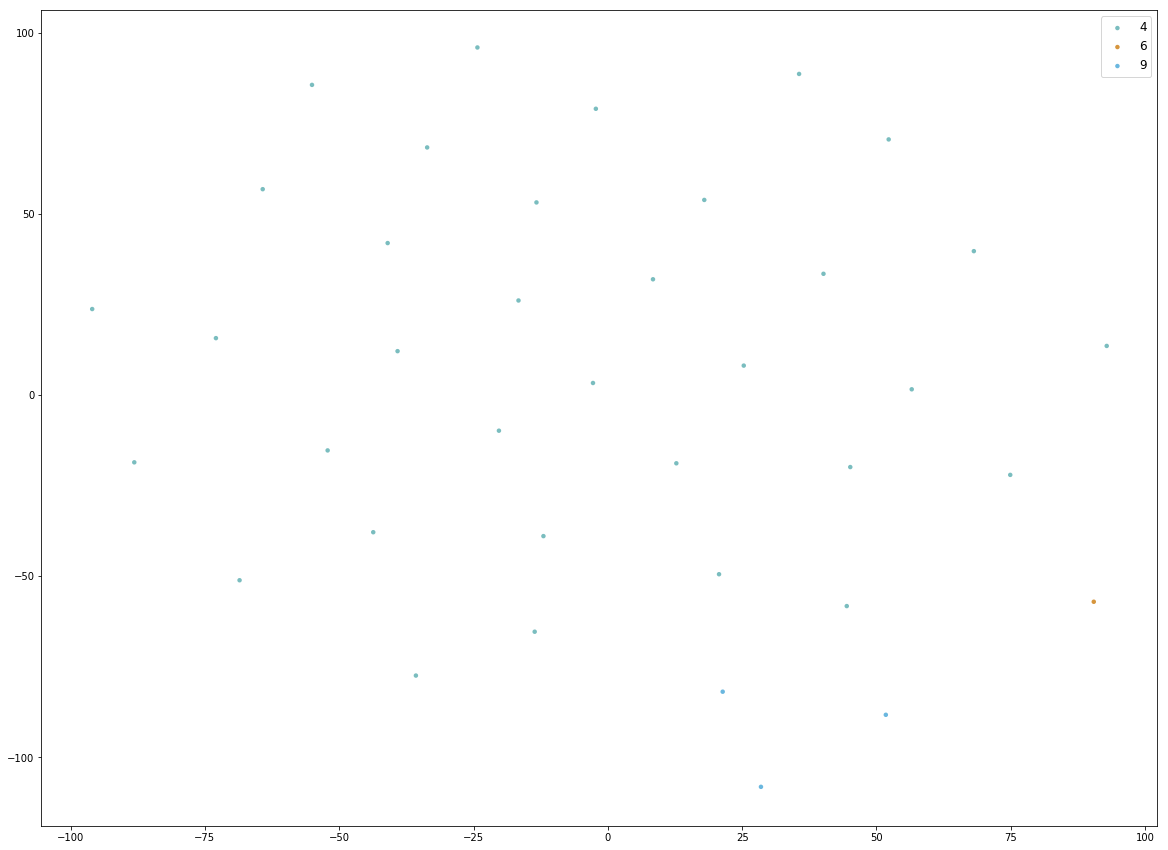

In [64]:
# топики обр-программ по модулю 
education_module_name = pd.read_csv('./ed.csv')['name']
print_education_program_name_by_topic(topics_ed, education_module_name)       
print_topics_ed(70,components_ed, terms_ed, './ed_voc')
visualize_topic(embedding_ed, topics_ed)

Topic 0:  проектирование защищенных автоматизированных систем;безопасность офисных программ;управление итпроектами;проектирование автоматизированных систем обработки информации и управления;конструкторскотехнологическое обеспечение производства эвм;методы информационного поиска
Topic 1: технологии и методы программирова;проектирование интернет  приложений
Topic 2: конфиденциальное делопроизводство;инструменты моделирования бизнеспроцессов
Topic 3: основы информационнокоммуникационных технологий и сетевое администрирование;локальные компьютерные сети;алгоритмы и структуры данных
Topic 4: цифровая обработка изображений;прикладная бизнесаналитика
Topic 5: алгоритмы и структуры данных
Topic 7: криптографические методы и средства защиты информации;webпрограммирование;клиентсерверные техно
Topic 8: безопасность вычислительных сетей;управление проектами;nan
Topic 10: организация защищенного электронного документооборота;webдизайн;nan
Topic 11: автоматизированные системы управления технологиче

15 - 2
16 - 5
18 - 5
19 - 3
20 - 2
21 - 4
22 - 4
23 - 15
24 - 1


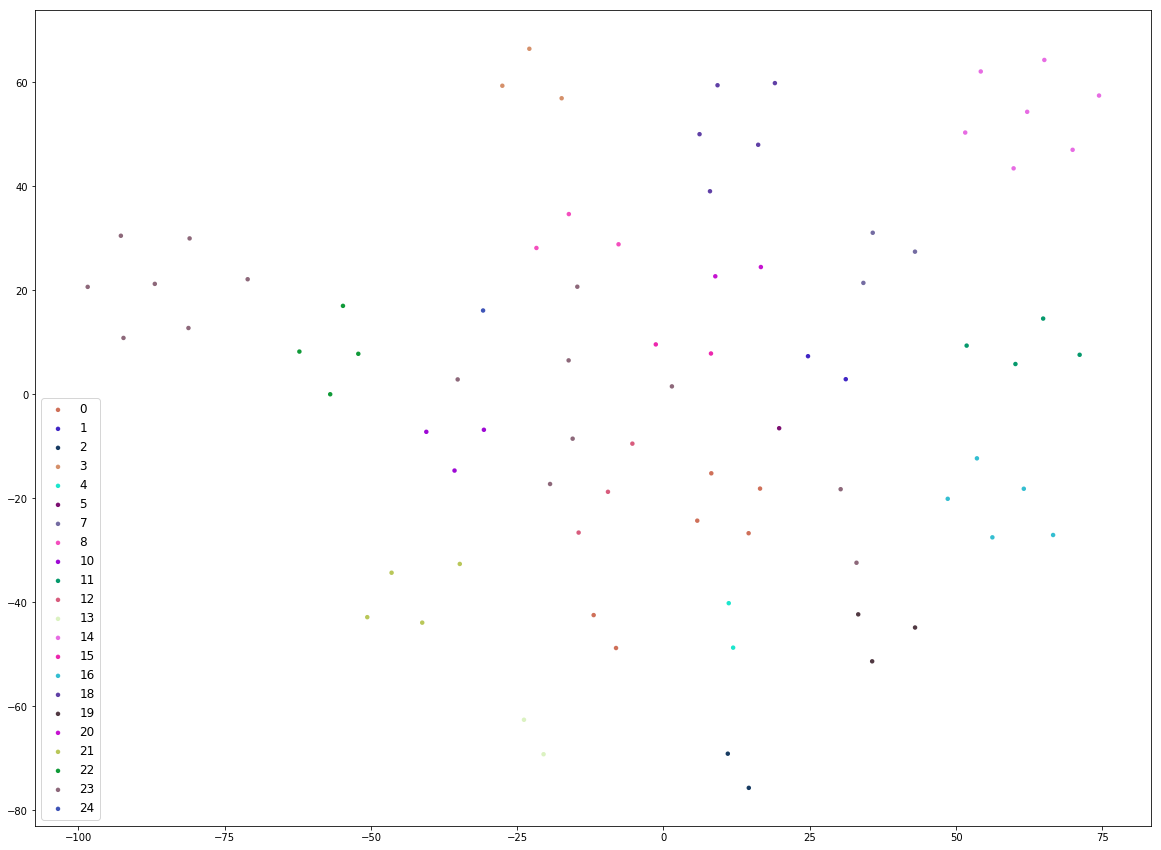

In [65]:
# топики обр-программ по дисциплинам 
education_dist_name = pd.read_csv('./ed_by_dist.csv')['name']
print_education_program_name_by_topic(topics_ed_dist, education_dist_name)       
print_topics_ed(70,components_ed_dist, terms_ed_dist, './ed_dist_voc')
visualize_topic(embedding_ed_dist, topics_ed_dist)

Topic 1: Интернет-технологии
Topic 2: Безопасность сетевых технологий;Безопасные автоматизированные системы;Основы информационных процессов;Современные сетевые технологии;Администрирование информационных систем;Программное обеспечение информационных систем
Topic 3: Анализ предметной области;Базы данных и знаний;Концепции современного программирования;Промышленные базы данных;Базы данных и интеллектуальные системы;Интеллектуальные методы анализа информации;Методы анализа Big Data;Менеджмент в информационных технологиях;Основания информатики и программирования;Языки логического программирования;Моделирование бизнес-процессов;Обеспечение качества и тестирование программного обеспечения;Разработка программного обеспечения
Topic 4: Машинная графика
Topic 9: Информационные технологии;Информационно-управляющие системы;Проектирование микропроцессорных систем
Topic 10: Многоуровневые и мобильные приложения;Средства и технологии разработки программного обеспечения;Реальное программирование;Прогр


Topic 14: цифровой университет телек клиент департамент качественный интернет команда онлайн россия профессионал услуга больший обработка готовый направление сервис работа опыт спутниковый домашний абонент материал маршрут дата подключение связь сеть выполнять поиск великобритания компания 

Topic 15: энергия безопасность деньга защита информационный информация средство уязвимость область нормативный угроза обеспечение законодательство проведение документ фстэк аудит защищенность государственный гост криптографический соответствие расследование правовой стандарт разработка анализ рф орган атака технический технология требование персональный знание министерство информатизация подпись участие организационно документация нсд доступ акт власть электронный утечка противодействие россия аттестация событие криптография метод iso тайна образование security закон сетевой мера риск сфера комплексный объект внедрение 

Topic 16: продукт портал веб js драйвер потенциально приложение название куча

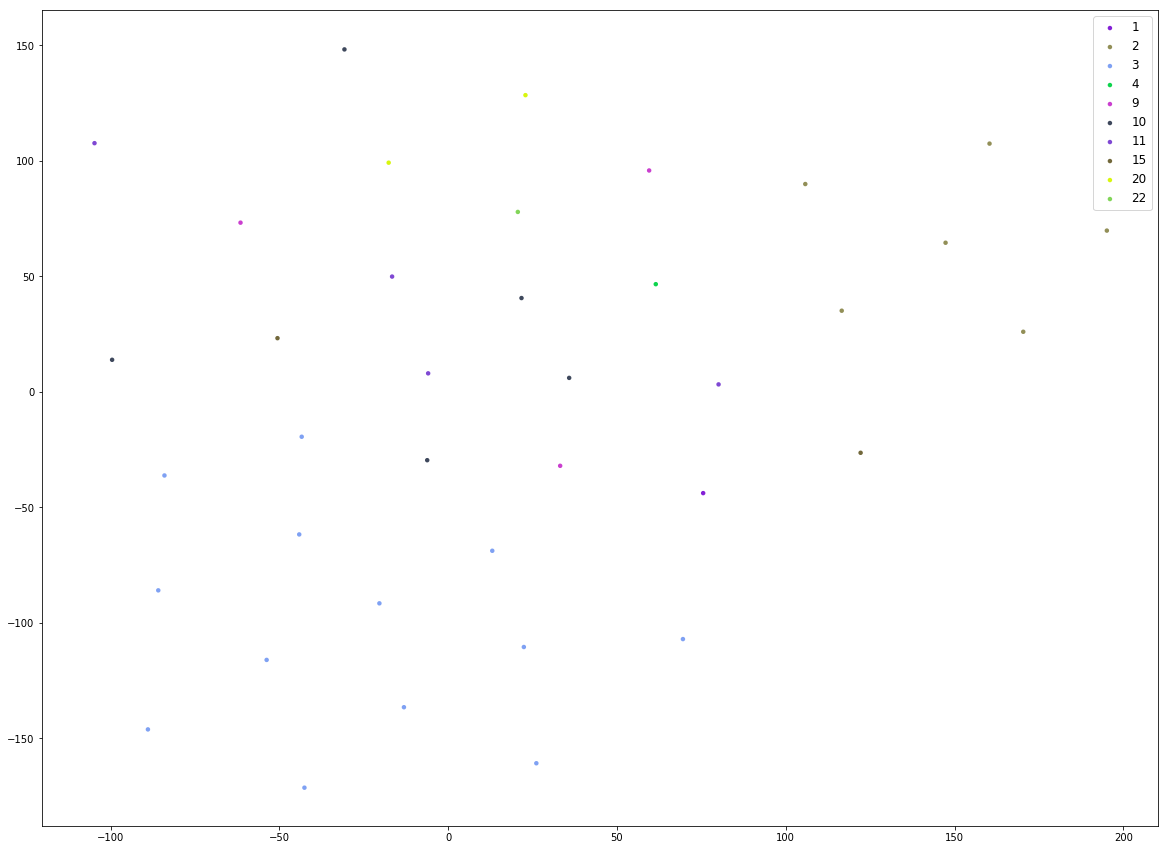

In [57]:
# топики обр-программ по модулю на модели hh
education_module_name = pd.read_csv('./ed.csv')['name']
print_education_program_name_by_topic(topics_com_ed, education_module_name)       
print_topics_ed(70,components_com_ed, terms_com_ed, './ed_voc')
visualize_topic(embedding_com_ed, topics_com_ed)

25
0 - 30
1 - 33
2 - 19
3 - 73
4 - 36
5 - 64
6 - 3
7 - 33
8 - 99
9 - 1
10 - 1
11 - 27
12 - 2
13 - 79
14 - 830
15 - 10422
16 - 63
17 - 36009
18 - 52
19 - 37
20 - 21
21 - 115
22 - 6
23 - 17
24 - 21

Topic 0: проводиться russia брокерский наладка testing открытый consul pc roadmap fiddler оргтехника визуальный генерация мо concurrency инфок mvp выработка культура куратор курс малый непростой javascript ибп приёмка интервьюирование frontend дистрибьютор говорить ms инвестиция одновременный автор добровольный firebird входить servlets директ адекватность инициирование soc telegram кв известность visa курирование организация базироваться желаемый инжиниринг инжиниринговый инициативный инсталляция институт инструкция инструмент интегратор интенсивный интересный интерпретация интерфейс интерфейсный интерьер интранет информатизация коммуникация обувь оклад концептуальный 

Topic 1: идти изделие идея издержка кинотеатр инженерный клубный забота orm изучать ассортиментный инсайт агрегатор анкета 


Topic 21: измерительный чпу lte член rs чтз пресейлов цепочка запчасть ориентирование приглашаться заказ оптимизационный firebird аксессуар остаток заголовок придумывать заполнение platform привычка rabbit школьник оптимизатор откликаться dhcp логирование dynamics старший patterns местный предпродажный сильнейший шкаф модель мода консоль инвестиционный принципиальный etl банкинг jmeter сквозной банка претензионный жилищный ответственный диагностический cms инцидент правильно кредитный мат криптопро штаб power outlook шлюз чёткий коммуникация журнал препроцессор шанс швеция шеф широкополосный школа штат штатный багаж 

Topic 22: пб положение сверка ежедневно привлекать telegram учёт гореть bamboo soa начинающий plus гоша криптопро patterns platform искать военный объесть очно mariadb архитектор pre ps directory tcp доклад hh авиационный граф достоверный механический идеал единственный ipv4 диплом взаимовыгодный ежедневный html5 word богатый hr аналитик apps open post журналистика fi re

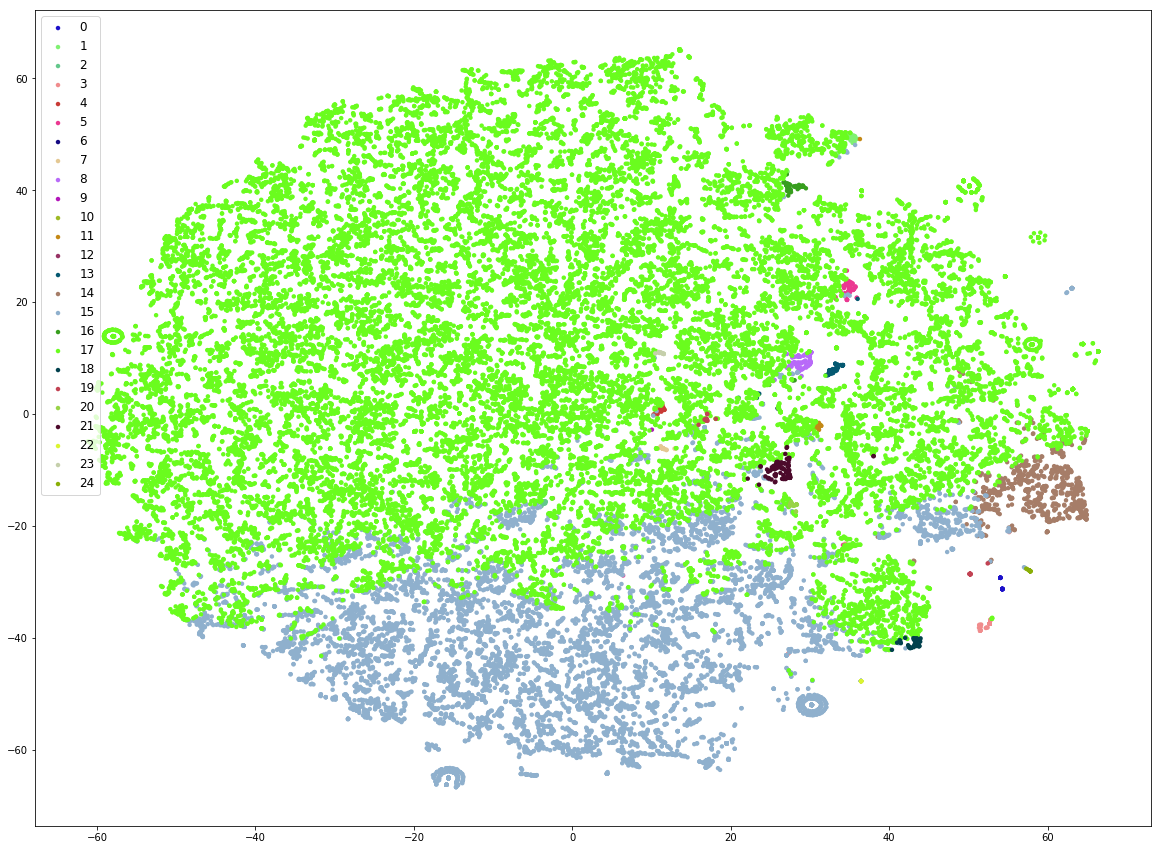

In [42]:
# топики hh на модели обр-программ по модулю
visualize_topic(embedding_hh_com, topics_hh_com)
print_topics(70,components_hh_com, terms_hh_com)

Topic 0: теория информации;управление итпроектами;проектирование автоматизированных систем обработки информации и управления;конструкторскотехнологическое обеспечение производства эвм;основы машинного обучения;методы информационного поиска;методы информационного поиска;юзабилити и дизайн
Topic 3: теоретические основы автоматизированного управления;коллективная разработка программного обеспечения;инструменты моделирования бизнеспроцессов;прикладная бизнесаналитика;программирование в net
Topic 4: безопасность вычислительных сетей;сетевые технологии;операционные системы;катастрофоустойчивость информационных систем;операционные системы;основы информационнокоммуникационных технологий и сетевое администрирование;построение масштабируемых сетей;локальные компьютерные сети;разработка и администрирование webсерверов;компьютерные сети
Topic 5: системы реального времени;графические интерфейсы программного обеспечения;объектноориентированное программирование;webпрограммирование;объектноориентирова

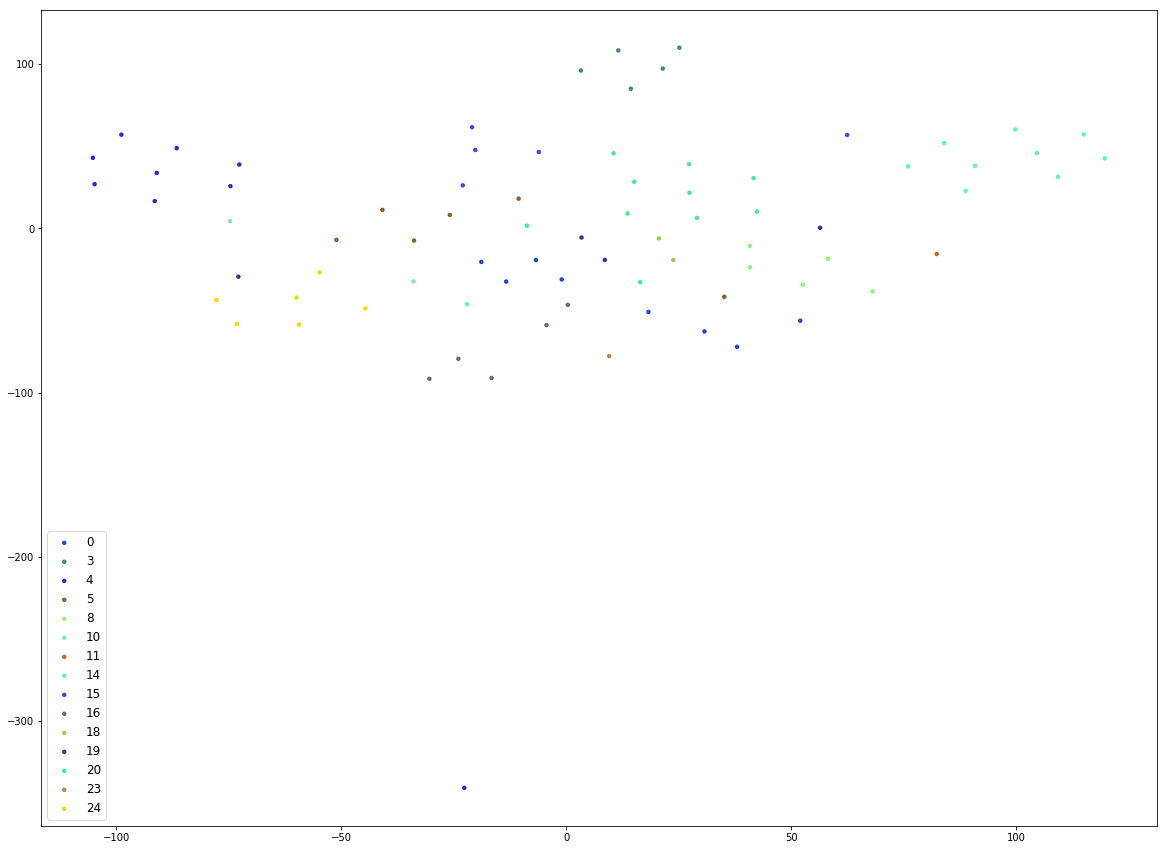

In [66]:
# топики обр-программ по дисциплинам на модели hh
education_dist_name = pd.read_csv('./ed_by_dist.csv')['name']
print_education_program_name_by_topic(topics_com_dist_ed, education_dist_name)       
print_topics_ed(70,components_com_dist_ed, terms_com_dist_ed, './ed_dist_voc')
visualize_topic(embedding_com_dist_ed, topics_com_dist_ed)

25
0 - 384
1 - 258
2 - 305
3 - 15
4 - 243
5 - 2248
6 - 128
7 - 57
8 - 681
9 - 53
10 - 61
11 - 10
12 - 37
13 - 297
14 - 300
15 - 125
16 - 67
17 - 12297
18 - 274
19 - 263
20 - 26133
21 - 23
22 - 3574
23 - 259
24 - 1

Topic 0: pipeline nuxt иконка switching видение cpm карьерный 3х обучение обучить релиз хозяйственный интеллект взаимодействие здоровье опрятный редко резидент результат волейбол альпина кола уязвимость фаза французский регистратор результативность рекламный vlan киев вежливый хостинг хранение филиал философия регистр autolayout idef0 региональный режим резерв hana gtm работодатель кластерный кинотеатр review хватать целесообразность целый цена ккм кибербезопасность бояться доводить оплачивать определение определённый опрос ходьба австралия характеристика хобби администрация угроза файл финансовый фич фй формальный 

Topic 1: object монетизация значимый документированный company скрам jquery поступать достаточный консультант слаженный высокотехнологичный всероссийский гост и

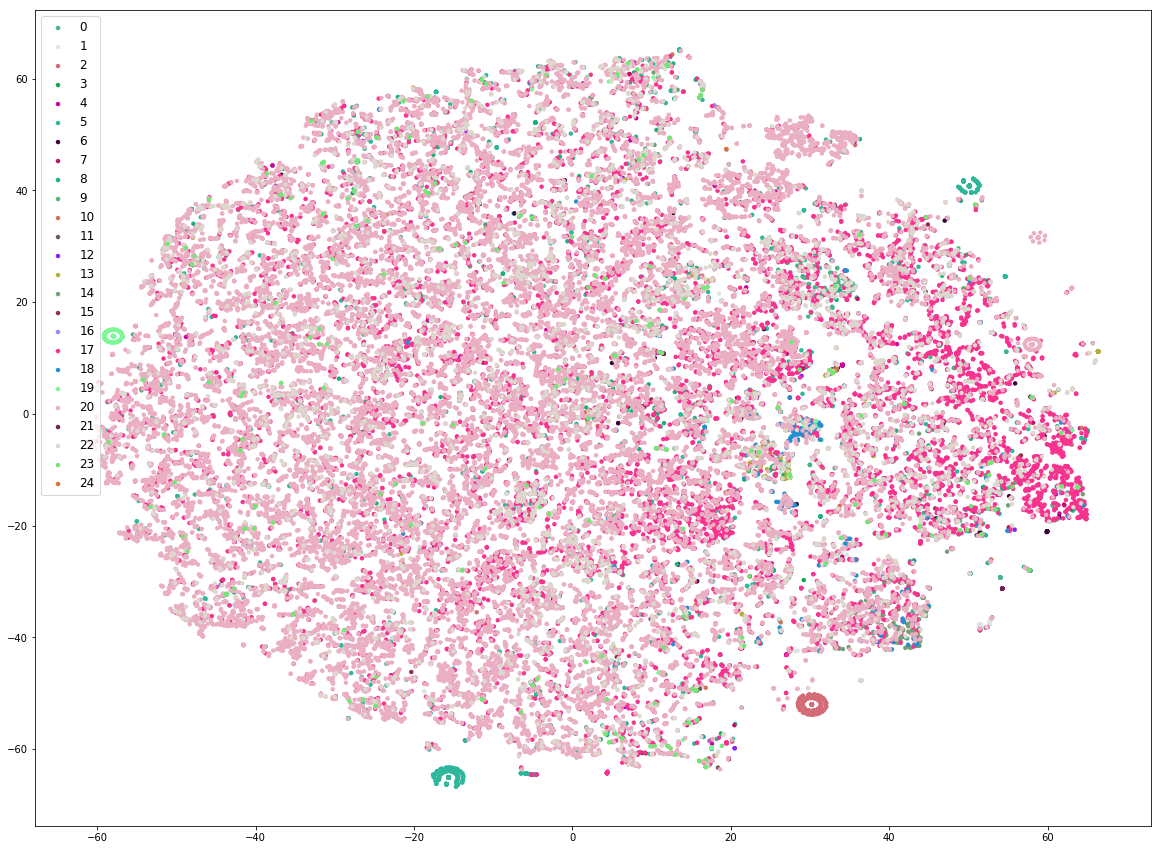

In [67]:
# топики hh на модели обр-программ по дисциплинам
visualize_topic(embedding_hh_com_matrix_dist, topics_hh_com_matrix_dist)
print_topics(70,components_hh_com_matrix_dist, terms_hh_com_matrix_dist)